In [45]:
import numpy as np
import pandas as pd

### Problem 2 
#### Load and preprocess the data
Read the data from csv file

In [46]:
vstable = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/Data/bank_data.csv", index_col=0, na_values=["?"])

vstable.shape

(600, 11)

Showing the sample of first 5 rows

In [47]:
vstable.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


#### Examine missing values
The below cell shows the general info about the table. We see there are no missing values for any columns.

In [48]:
vstable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, ID12101 to ID12700
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           600 non-null    int64  
 1   income        600 non-null    float64
 2   children      600 non-null    int64  
 3   gender        600 non-null    object 
 4   region        600 non-null    object 
 5   married       600 non-null    object 
 6   car           600 non-null    object 
 7   savings_acct  600 non-null    object 
 8   current_acct  600 non-null    object 
 9   mortgage      600 non-null    object 
 10  pep           600 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 56.2+ KB


In [49]:
vs_records = vstable[['age', 'income', 'children', 'gender', 'region', 'married', 'car','savings_acct', 'current_acct', 'mortgage']]
vs_records.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage
id,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO


Separating the target variable

In [50]:
vs_target = vstable.pep
vs_target.head()

id
ID12101    YES
ID12102     NO
ID12103     NO
ID12104     NO
ID12105     NO
Name: pep, dtype: object

We use Pandas "get_dummies" function to create dummy variables.

In [51]:
vs_matrix = pd.get_dummies(vs_records[['age', 'income', 'children', 'gender', 'region', 'married', 'car','savings_acct', 'current_acct', 'mortgage']])
vs_matrix.head(10)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12101,48,17546.00,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
ID12102,40,30085.10,3,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
ID12103,51,16575.40,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
ID12104,23,20375.40,3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
ID12105,57,50576.30,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0
ID12106,57,37869.60,2,1,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0
ID12107,22,8877.07,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0
ID12108,58,24946.60,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0
ID12109,37,25304.30,2,1,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0


We divide the data into randomized training and test partitions (note that the same split should also be perfromed on the target attribute). The easiest way to do this is to use the "train_test_split" module of "sklearn.cross_validation".

In [52]:
from sklearn.model_selection import train_test_split
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix, vs_target, test_size=0.2, random_state=33)

print(vs_test.shape)
vs_test[0:5]

(120, 19)


,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12557,32,13267.6,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1
ID12467,59,29866.9,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
ID12232,61,41609.5,3,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1
ID12549,53,48971.6,3,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0
ID12438,65,38080.9,1,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,1


In [53]:
print(vs_train.shape)
vs_train[0:5]

(480, 19)


,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12482,46,32583.5,2,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
ID12105,57,50576.3,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0
ID12187,25,15525.0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0
ID12184,35,16394.4,1,0,1,1,0,0,0,0,1,1,0,0,1,0,1,1,0
ID12624,34,16291.0,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1


Performing min-max normalization to rescale numeric attributes.

In [54]:
from sklearn import preprocessing

In [55]:
min_max_scaler = preprocessing.MinMaxScaler().fit(vs_train)

vs_train_norm = min_max_scaler.transform(vs_train)
vs_train_norm = pd.DataFrame(vs_train_norm, columns=vs_train.columns, index=vs_train.index)

vs_test_norm = min_max_scaler.transform(vs_test)
vs_test_norm = pd.DataFrame(vs_test_norm, columns=vs_test.columns, index=vs_test.index)

Showing the first 5 rows of normalised data

In [56]:
# np.set_printoptions(precision=2, linewidth=80, suppress=True)
vs_train_norm.head()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12482,0.571429,0.462547,0.666667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
ID12105,0.795918,0.779122,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
ID12187,0.142857,0.162411,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
ID12184,0.346939,0.177708,0.333333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
ID12624,0.326531,0.175889,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [57]:
vs_test_norm.head()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12557,0.285714,0.122693,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
ID12467,0.836735,0.414750,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
ID12232,0.877551,0.621355,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
ID12549,0.714286,0.750888,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
ID12438,0.959184,0.559271,0.333333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [58]:
from sklearn import neighbors, tree

#### KNN classifer
Setting number the number of neighbors to 5 and weights = 'distance'

In [59]:
n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(vs_train_norm, vs_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

Calling the predict function on the test intances to produce the predicted classes.

In [60]:
knnpreds_test = knnclf.predict(vs_test_norm)

In [61]:
print(knnpreds_test)

['YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO']


In [62]:
from sklearn.metrics import classification_report

##### Classification Report

In [63]:
print(classification_report(vs_target_test, knnpreds_test))

              precision    recall  f1-score   support

          NO       0.68      0.73      0.70        66
         YES       0.63      0.57      0.60        54

    accuracy                           0.66       120
   macro avg       0.65      0.65      0.65       120
weighted avg       0.66      0.66      0.66       120



The average accuracy rate is 0.66.

In [64]:
from sklearn.metrics import confusion_matrix

##### Confusion Matrix

In [65]:
knncm = confusion_matrix(vs_target_test, knnpreds_test)
print(knncm)

[[48 18]
 [23 31]]


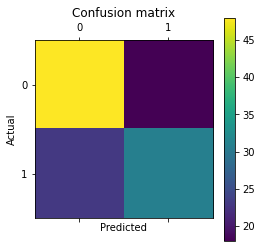

In [66]:
import pylab as plt
%matplotlib inline
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

As can be seen in the above confusion matrix, we see a value of 48 for True Positives and value of 31 for True Negatives.
False positives and False negatives have a value around 23 and 18 respectively.
##### Accuracy score

In [67]:
print("Score on Training: ",knnclf.score(vs_train_norm, vs_target_train))
print("Score on Test: ",knnclf.score(vs_test_norm, vs_target_test))

Score on Training:  1.0
Score on Test:  0.6583333333333333


KNN classification is performed on the dataset. The accuracy rate on the training set is showing a perfect score of 1. The accuracy score on the training set is higher than the testing set. This concludes the model is overfitting.

##### Experiment Run

n_neighbors = 10

knnclf = neighbors.KNeighborsClassifier(n_neighbors)
knnclf.fit(vs_train_norm, vs_target_train)

knnpreds_test = knnclf.predict(vs_test_norm)

print("Score on Training: ",knnclf.score(vs_train_norm, vs_target_train))
print("Score on Test: ",knnclf.score(vs_test_norm, vs_target_test))

Score on Training:  0.76875
Score on Test:  0.6916666666666667

The default weights parameter ‘uniform’ where all points in each neighborhood are weighted equally and neighbor value = 10 worked best for my model.

The average accuracy score with test instance was 0.69 while the accuracy score with train instance was 0.77.

The difference between the accuracy score of the test instance and train instance was minimum as compared to all the models.
Using the weights = distance, the model using the training set is overfitting and the accuracy score for the test data is low.

#### Decision Tree (Default Parameters)
Setting the default value of Decision using criterion='entropy'

In [68]:
treeclf = tree.DecisionTreeClassifier()
treeclf = treeclf.fit(vs_train, vs_target_train)

In [69]:
treepreds_test = treeclf.predict(vs_test)
print(treepreds_test)

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO'
 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES'
 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES'
 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO']


In [70]:
print("Score on Training: ",treeclf.score(vs_train, vs_target_train))
print("Score on Test: ",treeclf.score(vs_test, vs_target_test))

Score on Training:  1.0
Score on Test:  0.825


Decision tree classifier using default parameters is performed on the dataset. The accuracy rate on the training set is showing a perfect score of 1. The accuracy score on the training set is higher than the testing set. This concludes the model is overfitting.
##### Classification Report

In [71]:
print(classification_report(vs_target_test, treepreds_test))

              precision    recall  f1-score   support

          NO       0.84      0.85      0.84        66
         YES       0.81      0.80      0.80        54

    accuracy                           0.82       120
   macro avg       0.82      0.82      0.82       120
weighted avg       0.82      0.82      0.82       120



The average accuracy rate for decision tree is 0.82.
##### Confusion matrix

In [72]:
treecm = confusion_matrix(vs_target_test, treepreds_test)
print(treecm)

[[56 10]
 [11 43]]


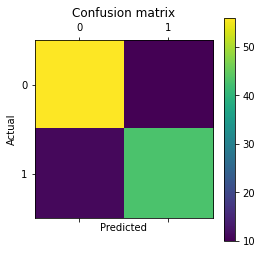

In [73]:
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

As can be seen in the above confusion matrix, we see a value of 57 for True Positives and value of 42 for True Negatives. False positives and False negatives have a value around 12 and 9 respectively.
##### Decision Tree Graph

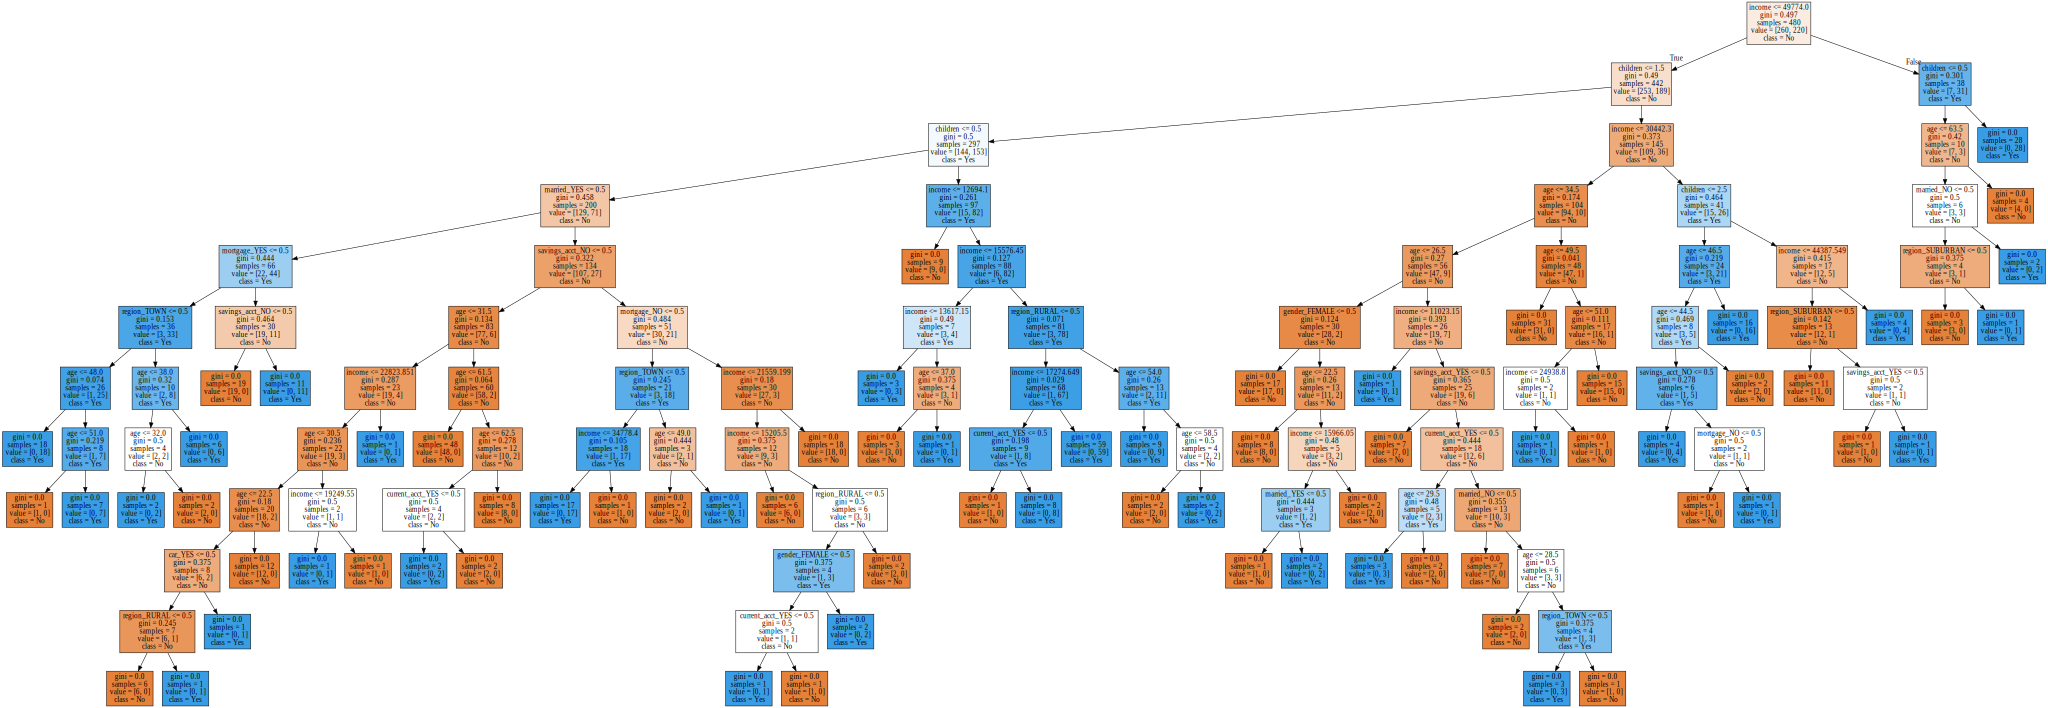

In [74]:
from sklearn.tree import export_graphviz

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

import graphviz

export_graphviz(treeclf,out_file='dtree.dot', feature_names=vs_train.columns, class_names=["No","Yes"],filled=True)

with open("dtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [75]:
system(dot -Tpng dtree.dot -o dtree.png)

[]

Decision trees is an example of model with low bias and high variance. The tree makes almost no assumptions about target function but it is highly susceptible to variance in data.

More the depth of the decision tree means lesser the bias as we're relying on data more rather than assumptions. If the tree is shallow then we're not checking a lot of conditions/constrains ie the logic is simple or less complex, hence it automatically reduces over-fitting. This introduces more bias compared to deeper trees where we overfit the data.

When a new data point is fed, even if one of the parameters deviates slightly, the condition will not be met and it will take the wrong branch. Therefore it has high variance.

In the above example, we are not prunning the tree during the process causing the tree to overfit having an accuracy score of 1 on the training data.

#### Decision Tree (entropy)

In [76]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=10, max_depth=5)
treeclf = treeclf.fit(vs_train, vs_target_train)

In [77]:
treepreds_test = treeclf.predict(vs_test)
print(treepreds_test)

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'YES']


In [78]:
print("Score on Training: ",treeclf.score(vs_train, vs_target_train))
print("Score on Test: ",treeclf.score(vs_test, vs_target_test))

Score on Training:  0.8666666666666667
Score on Test:  0.7916666666666666


Decision tree classifier using default parameters is performed on the dataset. The accuracy score on the training set is higher than the testing set but difference between the accuracy score of the training set and testing set is nearly equal.
##### Classification Report

In [79]:
print(classification_report(vs_target_test, treepreds_test))

              precision    recall  f1-score   support

          NO       0.77      0.89      0.83        66
         YES       0.84      0.67      0.74        54

    accuracy                           0.79       120
   macro avg       0.80      0.78      0.78       120
weighted avg       0.80      0.79      0.79       120



The average accuracy rate for decision tree is ~0.80.
##### Confusion matrix

In [80]:
treecm = confusion_matrix(vs_target_test, treepreds_test)
print(treecm)

[[59  7]
 [18 36]]


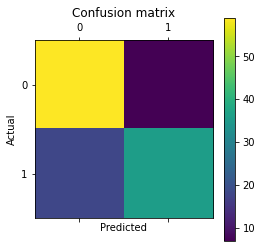

In [81]:
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

As can be seen in the above confusion matrix, we see a value of 59 for True Positives and value of 36 for True Negatives.
False positives and False negatives have a value around 18 and 7 respectively.
##### Decision Tree Graph

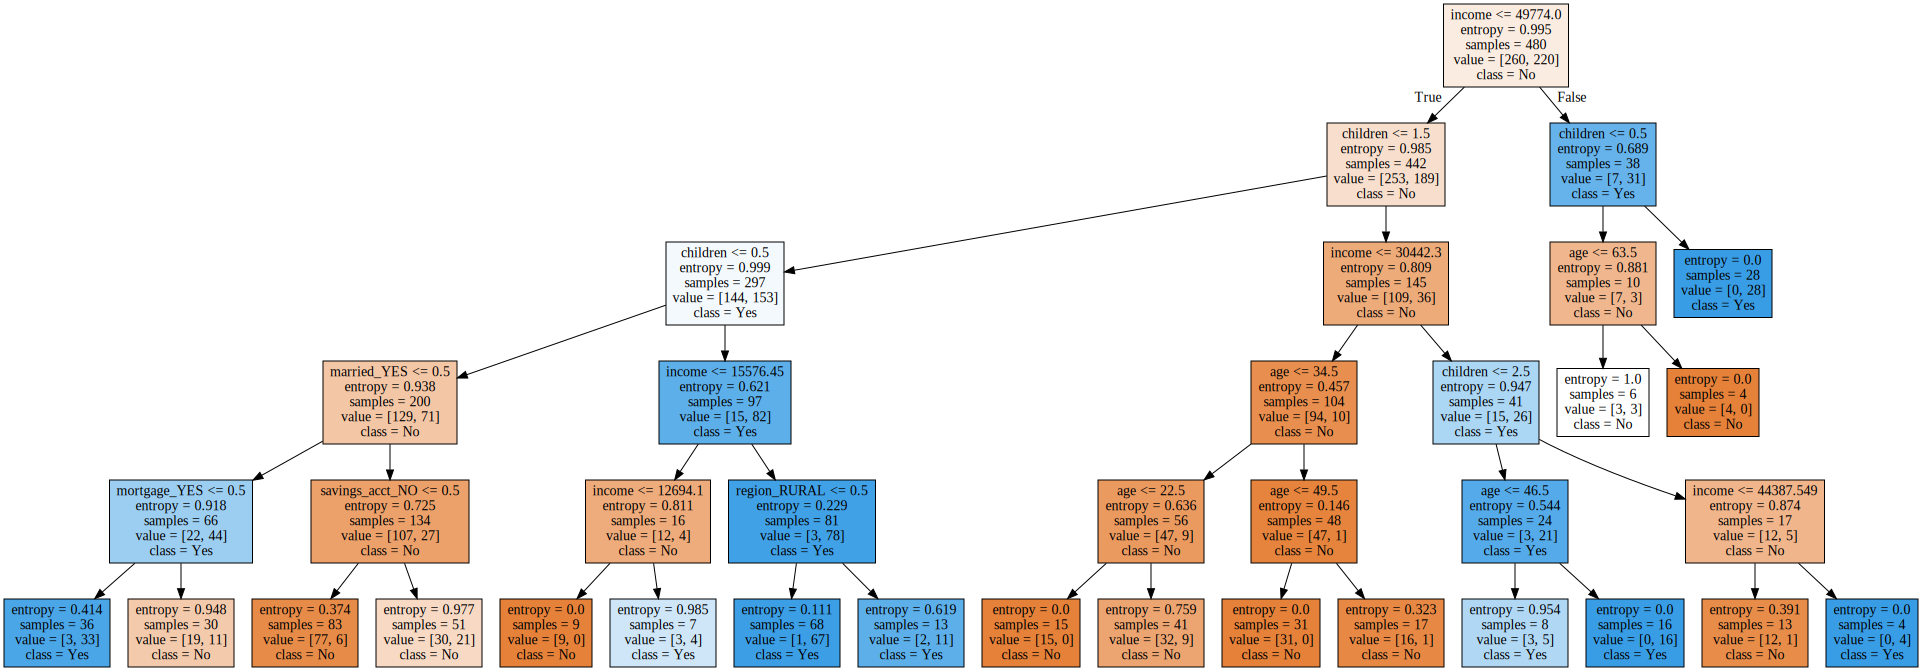

In [82]:
from sklearn.tree import export_graphviz

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

tree = export_graphviz(treeclf, out_file='prune_dtree.dot', feature_names=vs_train.columns, class_names=['No','Yes'],filled=True)
with open("prune_dtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [83]:
system(dot -Tpng prune_dtree.dot -o prune_dtree.png)

[]

The above graph shows up the pruned version of the decision tree with a better accuracy rate for the training model and the testiing model.